# Importing libraries

In [201]:
#Data wrangling and visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import kaleido as kd

#Statistics and ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


# Importing dataset

In [242]:
# Carregar os dados
df = pd.read_csv('C:\\Users\\Matias\\OneDrive\\Documentos\\Cursos\\Portfolio\\Risk Analyst Case\\transactional-sample.csv', sep=';')
df[:5]

,transaction_id,merchant_id,user_id,card_number,transaction_date,Date,Time,DateTime,transaction_amount,device_id,has_cbk,DateTime_previous_transaction,Minutes_since_last_transaction
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,01/12/2019,23:16:32,01/12/2019 23:16,374.56,285475,False,-,-
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,01/12/2019,22:45:37,01/12/2019 22:45,734.87,497105,True,30/11/2019 03:00,"2,625"
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,01/12/2019,22:22:43,01/12/2019 22:22,760.36,-,False,-,-
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,01/12/2019,21:59:19,01/12/2019 21:59,2556.13,-,True,01/12/2019 19:17,162
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,01/12/2019,21:30:53,01/12/2019 21:30,55.36,860232,False,-,-


# Exploring the dataset

In [203]:
df.shape

(3199, 13)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  3199 non-null   int64  
 1   merchant_id                     3199 non-null   int64  
 2   user_id                         3199 non-null   int64  
 3   card_number                     3199 non-null   object 
 4   transaction_date                3199 non-null   object 
 5   Date                            3199 non-null   object 
 6   Time                            3199 non-null   object 
 7   DateTime                        3199 non-null   object 
 8   transaction_amount              3199 non-null   float64
 9   device_id                       3199 non-null   object 
 10  has_cbk                         3199 non-null   bool   
 11  DateTime_previous_transaction   3199 non-null   object 
 12  Minutes_since_last_transaction  31

In [205]:
df.describe()

,transaction_id,merchant_id,user_id,transaction_amount
count,3.199000e+03,3199.000000,3199.000000,3199.000000
mean,2.132200e+07,48771.128790,50891.077212,767.812904
std,9.236161e+02,29100.360839,29515.282827,889.095904
min,2.132040e+07,16.000000,6.000000,1.220000
25%,2.132120e+07,23426.000000,24267.500000,205.235000
50%,2.132200e+07,48752.000000,52307.000000,415.940000
75%,2.132280e+07,73915.000000,76837.000000,981.680000
max,2.132360e+07,99799.000000,99974.000000,4097.210000


In [206]:
#Remove columns that won't be used in the model (too many nulls or irrelevant)
df.isnull().sum()

transaction_id                    0
merchant_id                       0
user_id                           0
card_number                       0
transaction_date                  0
Date                              0
Time                              0
DateTime                          0
transaction_amount                0
device_id                         0
has_cbk                           0
DateTime_previous_transaction     0
Minutes_since_last_transaction    0
dtype: int64

Transações sem fraudes: 87.78%
Transações com fraudes: 12.22%



C:\Users\Matias\AppData\Local\Temp\ipykernel_8000\1459176282.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Transações sem fraudes: {round(df.has_cbk.value_counts(normalize=True)[0]*100, 2)}%')
C:\Users\Matias\AppData\Local\Temp\ipykernel_8000\1459176282.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Transações com fraudes: {round(df.has_cbk.value_counts(normalize=True)[1]*100, 2)}%\n')
C:\Users\Matias\AppData\Local\Temp\ipykernel_8000\1459176282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

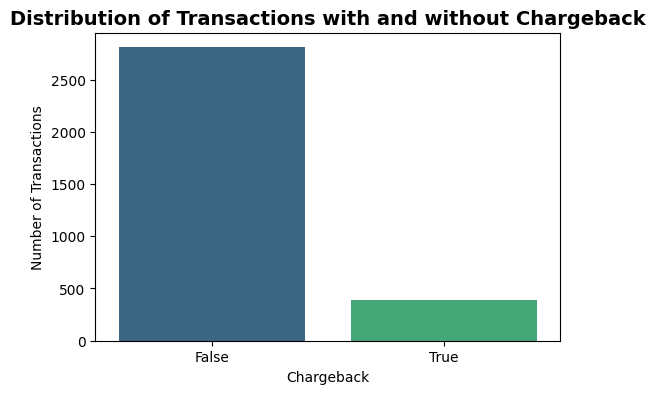

In [207]:
# imprimindo a quantidade de cada classe
print(f'Transações sem fraudes: {round(df.has_cbk.value_counts(normalize=True)[0]*100, 2)}%')
print(f'Transações com fraudes: {round(df.has_cbk.value_counts(normalize=True)[1]*100, 2)}%\n')

# definindo a área de plotagem
plt.figure(figsize=(6,4))

# Plotando o gráfico de contagem usando seaborn
sns.countplot(x='has_cbk', data=df, palette='viridis')

# Definindo título
plt.title('Distribution of Transactions with and without Chargeback', fontweight='bold', fontsize=14)

# Adicionando rótulos
plt.xlabel('Chargeback')
plt.ylabel('Number of Transactions')

# Exibindo o gráfico
plt.show()

In [208]:
# Transaction values statistics
df.transaction_amount.describe().round(2)

count    3199.00
mean      767.81
std       889.10
min         1.22
25%       205.24
50%       415.94
75%       981.68
max      4097.21
Name: transaction_amount, dtype: float64

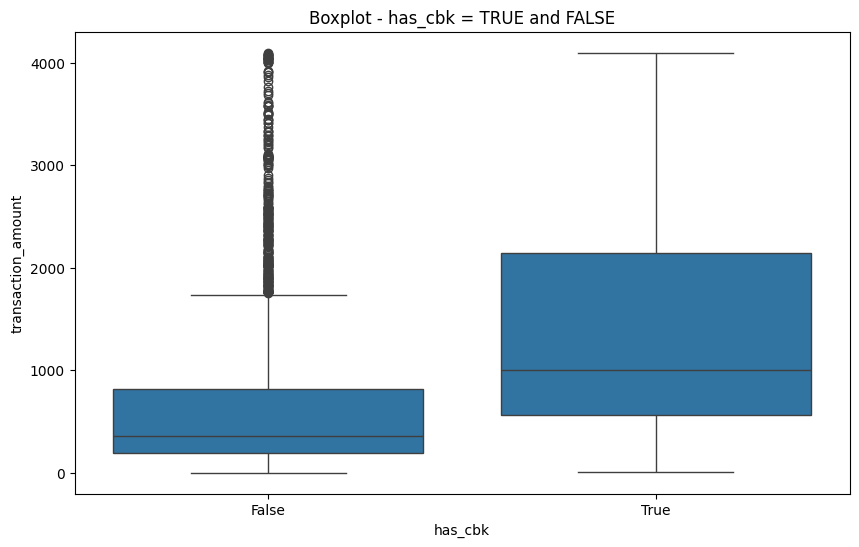

In [209]:
# Configure graph area
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot for has_cbk = TRUE e FALSE side by side
sns.boxplot(x='has_cbk', y='transaction_amount', data=df, ax=ax)
ax.set_title('Boxplot - has_cbk = TRUE and FALSE')

# Show boxplots
plt.show()

# Preparing Data

In [210]:
# Converting cathegorical variables in text format (string)
df['transaction_id'] = df['transaction_id'].astype(str)
df['merchant_id'] = df['merchant_id'].astype(str)
df['user_id'] = df['user_id'].astype(str)
df['card_number'] = df['card_number'].astype(str)
df['device_id'] = df['device_id'].astype(str)
df['has_cbk'] = df['has_cbk'].astype(str)

# Substituir "-" por NaN na coluna 'DateTime_previous_transaction'
df['device_id'] = df['device_id'].replace('-', np.nan)

In [211]:
# Convertendo Date para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convertendo Time para datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Convertendo DateTime para datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

# Substituir "-" por NaN na coluna 'DateTime_previous_transaction'
df['DateTime_previous_transaction'] = df['DateTime_previous_transaction'].replace('-', np.nan)

# Convertendo 'DateTime_previous_transaction' para datetime
df['DateTime_previous_transaction'] = pd.to_datetime(df['DateTime_previous_transaction'], errors='coerce', format='%d/%m/%Y %H:%M')

# Substituir "-" por NaN na coluna 'DateTime_previous_transaction'
df['Minutes_since_last_transaction'] = df['Minutes_since_last_transaction'].replace('-', np.nan)

# Substituir vírgulas por nada na coluna 'Minutes_since_last_transaction'
df['Minutes_since_last_transaction'] = df['Minutes_since_last_transaction'].str.replace(',', '')

# Convertendo 'Minutes_since_last_transaction' para float64
df['Minutes_since_last_transaction'] = df['Minutes_since_last_transaction'].astype(float)


df.dtypes

transaction_id                            object
merchant_id                               object
user_id                                   object
card_number                               object
transaction_date                          object
Date                              datetime64[ns]
Time                              datetime64[ns]
DateTime                          datetime64[ns]
transaction_amount                       float64
device_id                                 object
has_cbk                                   object
DateTime_previous_transaction     datetime64[ns]
Minutes_since_last_transaction           float64
dtype: object

In [212]:
# Drop Minutes_since_last transaction' column 
df = df.drop(columns=['Minutes_since_last_transaction', 'DateTime_previous_transaction','transaction_date', 'Date', 'Time'])
df[:5]

,transaction_id,merchant_id,user_id,card_number,DateTime,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:00,374.56,285475,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:00,734.87,497105,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:00,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:00,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:00,55.36,860232,False


In [213]:
df['similar_card_in_the_day'] = 'no'

# Iterando sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Obtendo os 6 primeiros dígitos do cartão atual
    current_card_prefix = str(row['card_number'])[:6]
    
    # Filtrando transações nas últimas 24 horas antes da transação atual
    recent_transactions = df[(df['DateTime'] < row['DateTime']) & (df['DateTime'] >= row['DateTime'] - pd.Timedelta(days=1))]
    
    # Verificando se o prefixo do cartão atual aparece em alguma transação recente
    if any(recent_transactions['card_number'].astype(str).str.startswith(current_card_prefix)):
        df.at[index, 'similar_card_in_the_day'] = 'yes'

# Exibindo o DataFrame resultante
df

,transaction_id,merchant_id,user_id,card_number,DateTime,transaction_amount,device_id,has_cbk,similar_card_in_the_day
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:00,374.56,285475,False,no
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:00,734.87,497105,True,yes
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:00,760.36,NaN,False,no
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:00,2556.13,NaN,True,yes
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:00,55.36,860232,False,no
...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01 13:05:00,744.15,NaN,False,no
3195,21323593,9603,59275,528052******3611,2019-11-01 11:47:00,1403.67,NaN,False,no
3196,21323594,57997,84486,522688******9874,2019-11-01 10:23:00,1.55,NaN,False,no
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:00,359.68,NaN,False,no


In [214]:
# Creating numerical variables

# Creating count variables for 'user_id', 'merchant_id' and 'user_id'
df['merchant_transactions_count'] = df.groupby('merchant_id')['transaction_id'].transform('count')
df['user_transactions_count'] = df.groupby('user_id')['transaction_id'].transform('count')
df['card_transactions_count'] = df.groupby('card_number')['transaction_id'].transform('count')
df['device_transactions_count'] = df.groupby('device_id')['transaction_id'].transform('count')
df['device_transactions_count'].fillna(1, inplace=True)

# Sort the DataFrame by 'user_id' and 'DataTime' in descending order
df = df.sort_values(by=['user_id', 'DateTime'], ascending=[True, False])
# Calculate the time difference between the most recent transaction and the subsequent one for each 'card_number'
df['last_user_transaction_minutes'] = df.groupby('user_id')['DateTime'].diff().dt.total_seconds().abs() / 60

# Sort the DataFrame by 'card_number' and 'DataTime' in descending order
df = df.sort_values(by=['card_number', 'DateTime'], ascending=[True, False])
# Calculate the time difference between the most recent transaction and the subsequent one for each 'card_number'
df['last_card_transaction_minutes'] = df.groupby('card_number')['DateTime'].diff().dt.total_seconds().abs() / 60

# Sort the DataFrame by 'device_id' and 'DataTime' in descending order
df = df.sort_values(by=['device_id', 'DateTime'], ascending=[True, False])
# Calculate the time difference between the most recent transaction and the subsequent one for each 'card_number'
df['last_device_transaction_minutes'] = df.groupby('device_id')['DateTime'].diff().dt.total_seconds().abs() / 60

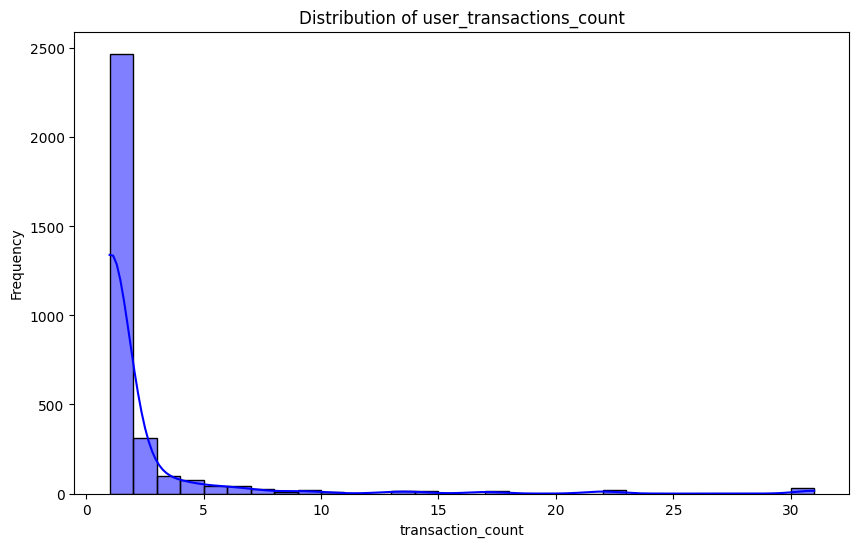

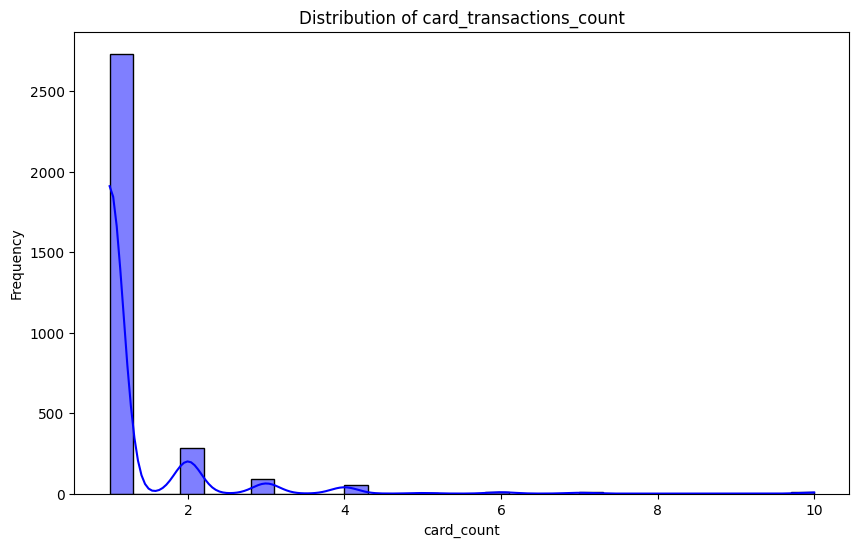

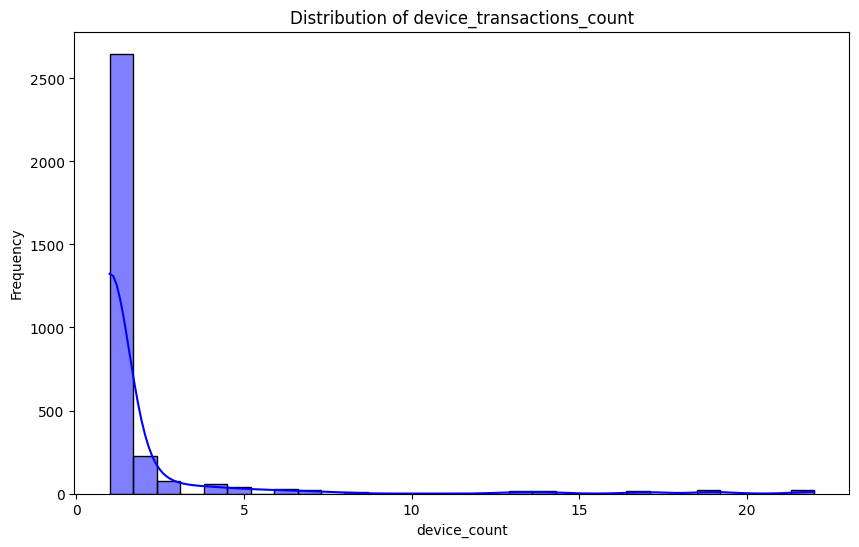

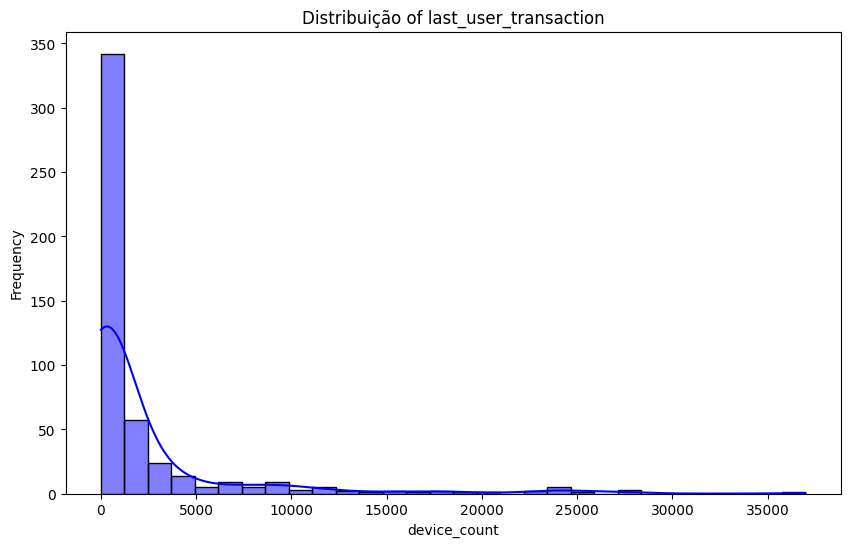

In [215]:
# Visual analysis to define bins size

plt.figure(figsize=(10, 6))
sns.histplot(df['user_transactions_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of user_transactions_count')
plt.xlabel('transaction_count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['card_transactions_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of card_transactions_count')
plt.xlabel('card_count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['device_transactions_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of device_transactions_count')
plt.xlabel('device_count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['last_user_transaction_minutes'], bins=30, kde=True, color='blue')
plt.title('Distribuição of last_user_transaction')
plt.xlabel('device_count')
plt.ylabel('Frequency')
plt.show()

In [216]:
# Creating cathegorical variables from the numerical variables
df['user_transactions_category'] = pd.cut(df['user_transactions_count'], bins=[0, 3, 10, float('inf')], labels=['low', 'medium', 'high'])
df['card_transactions_category'] = pd.cut(df['card_transactions_count'], bins=[0, 2, 10, float('inf')], labels=['low', 'medium', 'high'])
df['device_transactions_category'] = pd.cut(df['device_transactions_count'], bins=[0, 2, 10, float('inf')], labels=['low', 'medium', 'high'])
df['last_user_transaction_category'] = pd.cut(df['last_user_transaction_minutes'], bins=[0, 44, 1440, float('inf')], labels=['recent', 'medium', 'distant'])
df['last_card_transaction_category'] = pd.cut(df['last_card_transaction_minutes'], bins=[0, 44, 1440, float('inf')], labels=['recent', 'medium', 'distant'])

# Creating a variable to assess the deviation of the transaction amount from the mean for the merchant.
merchant_mean_amount = df.groupby('merchant_id')['transaction_amount'].mean()
# Mapear a média de 'transaction_amount' para o DataFrame original
df['merchant_avg_amount'] = df['merchant_id'].map(merchant_mean_amount)
# Calcular o desvio-padrão por 'merchant_id'
merchant_std_dev_amount = df.groupby('merchant_id')['transaction_amount'].std()
# Mapear o desvio-padrão de 'transaction_amount' para o DataFrame original
df['merchant_std_dev_amount'] = df['merchant_id'].map(merchant_std_dev_amount)
# Criar a variável 'transaction_profile_merchant' com as categorias 'atypical' e 'typical'
df['transaction_profile_merchant'] = np.where(df['transaction_amount'] > (df['merchant_avg_amount'] + df['merchant_std_dev_amount']), 'atypical', 'typical')

In [217]:
# Dealing with Null values
df['last_user_transaction_category'].fillna('distant', inplace=True)
df['last_card_transaction_category'].fillna('distant', inplace=True)
# Print the first few rows of the DataFrame
df

,transaction_id,merchant_id,user_id,card_number,DateTime,transaction_amount,device_id,has_cbk,similar_card_in_the_day,merchant_transactions_count,...,last_card_transaction_minutes,last_device_transaction_minutes,user_transactions_category,card_transactions_category,device_transactions_category,last_user_transaction_category,last_card_transaction_category,merchant_avg_amount,merchant_std_dev_amount,transaction_profile_merchant
720,21321118,18795,951,498453******5842,2019-11-29 04:05:00,161.35,100033,False,yes,1,...,NaN,NaN,low,low,low,distant,distant,161.350000,NaN,typical
1879,21322277,58690,5838,498442******3972,2019-11-22 16:50:00,121.96,100035,False,yes,1,...,NaN,NaN,low,low,low,distant,distant,121.960000,NaN,typical
2294,21322692,41264,62803,511781******5170,2019-11-19 20:17:00,588.94,100144,False,no,1,...,NaN,NaN,low,low,low,distant,distant,588.940000,NaN,typical
2491,21322889,49205,52725,412187******7118,2019-11-17 23:16:00,222.19,100927,False,no,73,...,NaN,NaN,low,low,low,distant,distant,377.942329,316.195652,typical
2685,21323083,12476,62985,536518******3116,2019-11-14 20:37:00,315.52,100951,False,no,5,...,NaN,NaN,low,low,low,distant,distant,179.770000,119.765979,atypical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01 13:05:00,744.15,NaN,False,no,4,...,NaN,NaN,low,low,low,distant,distant,724.842500,106.117667,typical
3195,21323593,9603,59275,528052******3611,2019-11-01 11:47:00,1403.67,NaN,False,no,1,...,NaN,NaN,low,low,low,distant,distant,1403.670000,NaN,typical
3196,21323594,57997,84486,522688******9874,2019-11-01 10:23:00,1.55,NaN,False,no,3,...,22937.0,NaN,low,medium,low,distant,distant,1.563333,0.350190,typical
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:00,359.68,NaN,False,no,3,...,NaN,NaN,low,low,low,distant,distant,494.620000,237.961650,typical


In [218]:
# Dropping useless columns
dropped_columns = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'DateTime', 'device_id', 
                   'card_transactions_count', 'device_transactions_count', 'last_user_transaction_minutes', 'merchant_transactions_count', 
                   'user_transactions_count', 'last_card_transaction_minutes', 'last_device_transaction_minutes', 'merchant_avg_amount', 'merchant_std_dev_amount']
df_restricted = df.drop(dropped_columns, axis=1)
df_restricted = df_restricted[['user_transactions_category', 'last_user_transaction_category', 
                               'transaction_profile_merchant', 'similar_card_in_the_day', 'transaction_amount', 'has_cbk']]
df_restricted

,user_transactions_category,last_user_transaction_category,transaction_profile_merchant,similar_card_in_the_day,transaction_amount,has_cbk
720,low,distant,typical,yes,161.35,False
1879,low,distant,typical,yes,121.96,False
2294,low,distant,typical,no,588.94,False
2491,low,distant,typical,no,222.19,False
2685,low,distant,atypical,no,315.52,False
...,...,...,...,...,...,...
3194,low,distant,typical,no,744.15,False
3195,low,distant,typical,no,1403.67,False
3196,low,distant,typical,no,1.55,False
3197,low,distant,typical,no,359.68,False


In [219]:
# Dividing the df in features/inputs/predictors/independent variables (X) and target variables (Y)
X = df_restricted.drop(columns=['has_cbk'], axis=1)
y = df.has_cbk
X

,user_transactions_category,last_user_transaction_category,transaction_profile_merchant,similar_card_in_the_day,transaction_amount
720,low,distant,typical,yes,161.35
1879,low,distant,typical,yes,121.96
2294,low,distant,typical,no,588.94
2491,low,distant,typical,no,222.19
2685,low,distant,atypical,no,315.52
...,...,...,...,...,...
3194,low,distant,typical,no,744.15
3195,low,distant,typical,no,1403.67
3196,low,distant,typical,no,1.55
3197,low,distant,typical,no,359.68


In [220]:
# Separating training and testing dataset
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .3, random_state = 123)

In [221]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (2239, 5)
X Test size:  (960, 5)
X Test proportion  30%


In [222]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (2239,)
Y Test size:  (960,)
Y Test proportion  30%


In [223]:
# Considering that we are dealing with unbalanced data, we will use oversampling tatistical technique to augment the number of cases in your dataset in a balanced manner.
#Cathegorical columns

categorical_columns = ['user_transactions_category', 'last_user_transaction_category', 'transaction_profile_merchant', 'similar_card_in_the_day']

# Creating a SMOTE object (SMOTE variant capable of dealing with both cathegorical and numerical variables)
smotenc = SMOTENC(sampling_strategy='auto',  categorical_features=categorical_columns, random_state=42)

#Oversampling
train_x, train_y =  smotenc.fit_resample(train_x,train_y)
train_y.value_counts()

has_cbk
False    1964
True     1964
Name: count, dtype: int64

# Applying models

In [224]:
#Substituindo categorias por valores numéricos para aplicar os modelos

#treino
ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2}

ordinal_columns_1 = ['user_transactions_category']
for column in ordinal_columns_1:
    train_x[column] = train_x[column].map(ordinal_mapping)

#2 colunas do meio
ordinal_mapping_2 = {'recent': 0, 'medium': 1, 'distant': 2}

ordinal_columns_2 = ['last_user_transaction_category'] 
for column in ordinal_columns_2:
    train_x[column] = train_x[column].map(ordinal_mapping_2)

#penútlima coluna: binária
binary_mapping = {'typical': 0, 'atypical': 1}
binary_column = 'transaction_profile_merchant' 
train_x[binary_column] = train_x[binary_column].map(binary_mapping)

#útlima coluna: binária
binary_mapping_2 = {'no': 0, 'yes': 1}
binary_column_2 = 'similar_card_in_the_day' 
train_x[binary_column_2] = train_x[binary_column_2].map(binary_mapping_2)

train_x

#Substituindo categorias por valores numéricos para aplicar os modelos

#teste
ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2}

ordinal_columns_1 = ['user_transactions_category']
for column in ordinal_columns_1:
    test_x[column] = test_x[column].map(ordinal_mapping)

#2 colunas do meio
ordinal_mapping_2 = {'recent': 0, 'medium': 1, 'distant': 2}

ordinal_columns_2 = ['last_user_transaction_category'] 
for column in ordinal_columns_2:
    test_x[column] = test_x[column].map(ordinal_mapping_2)

#penúltima coluna: binária
binary_mapping = {'typical': 0, 'atypical': 1}
binary_column = 'transaction_profile_merchant' 
test_x[binary_column] = test_x[binary_column].map(binary_mapping)

#última coluna: binária
binary_mapping_2 = {'no': 0, 'yes': 1}
binary_column_2 = 'similar_card_in_the_day' 
test_x[binary_column_2] = test_x[binary_column_2].map(binary_mapping_2)

train_x

,user_transactions_category,last_user_transaction_category,transaction_profile_merchant,similar_card_in_the_day,transaction_amount
0,0,2,0,0,1792.780000
1,0,2,0,1,199.210000
2,0,2,0,0,436.400000
3,0,2,1,1,587.010000
4,0,2,0,0,335.810000
...,...,...,...,...,...
3923,1,2,0,1,556.131547
3924,2,2,0,1,1078.943162
3925,1,1,0,1,2490.000510
3926,1,0,0,1,2034.931622


In [225]:
# Random Forest Classifier 
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_y)

y_predictions_rf = random_forest.predict(test_x)

In [226]:
# Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_y)

y_predictions_dt = decision_tree.predict(test_x)

In [227]:
# Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_y)

y_predictions_ab = ada_boost.predict(test_x)

In [228]:
# Gradient Boosting Classifier 
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)

y_predictions_gb = gradient_boosting.predict(test_x)

# Evaluating the models

In [255]:
unique_labels = test_y.unique()
chosen_pos_label = 'True'

# Métricas de avaliação Random Forest
classification_rep = classification_report(test_y, y_predictions_rf, target_names=unique_labels, output_dict=True)

# Acurácia
accuracy = classification_rep['accuracy']

# Precision, Recall e F1_score para cada classe
precision = classification_rep[chosen_pos_label]['precision']
recall = classification_rep[chosen_pos_label]['recall']
f1 = classification_rep[chosen_pos_label]['f1-score']

# Criando o DataFrame
metrics_rf = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                            'Results RF': [accuracy, precision, recall, f1]})
metrics_rf

,Metrics,Results RF
0,Accuracy,0.795833
1,Precision,0.337398
2,Recall,0.715517
3,F1_score,0.458564


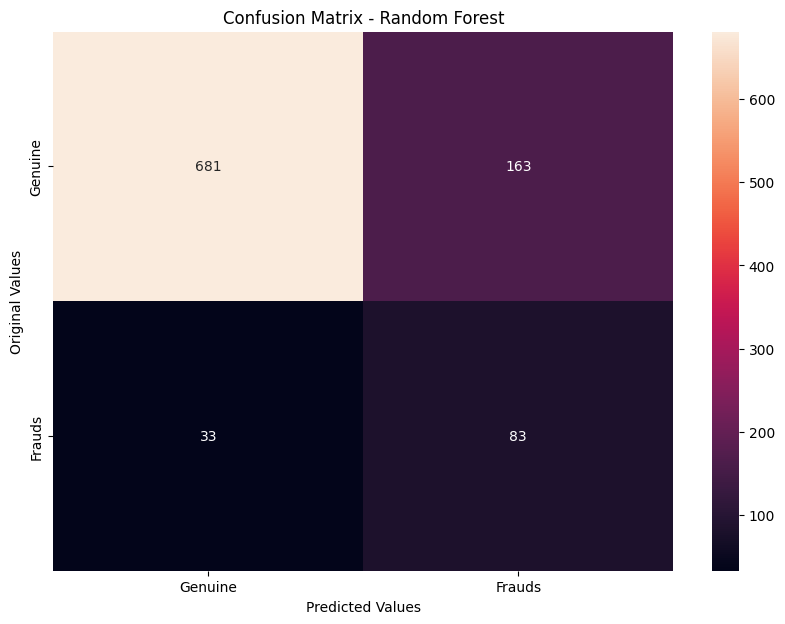

In [256]:
# Matriz de Confusão Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Original Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Frauds'])
ax.yaxis.set_ticklabels(['Genuine','Frauds'])
plt.show()

In [257]:
# Métricas de avaliação Decision Tree
classification_rep = classification_report(test_y, y_predictions_dt, target_names=unique_labels, output_dict=True)

# Acurácia
accuracy = classification_rep['accuracy']

# Precision, Recall e F1_score para cada classe
precision = classification_rep[chosen_pos_label]['precision']
recall = classification_rep[chosen_pos_label]['recall']
f1 = classification_rep[chosen_pos_label]['f1-score']

# Criando o DataFrame
metrics_dt = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                            'Results DT': [accuracy, precision, recall, f1]})
metrics_dt

,Metrics,Results DT
0,Accuracy,0.788542
1,Precision,0.333333
2,Recall,0.750000
3,F1_score,0.461538


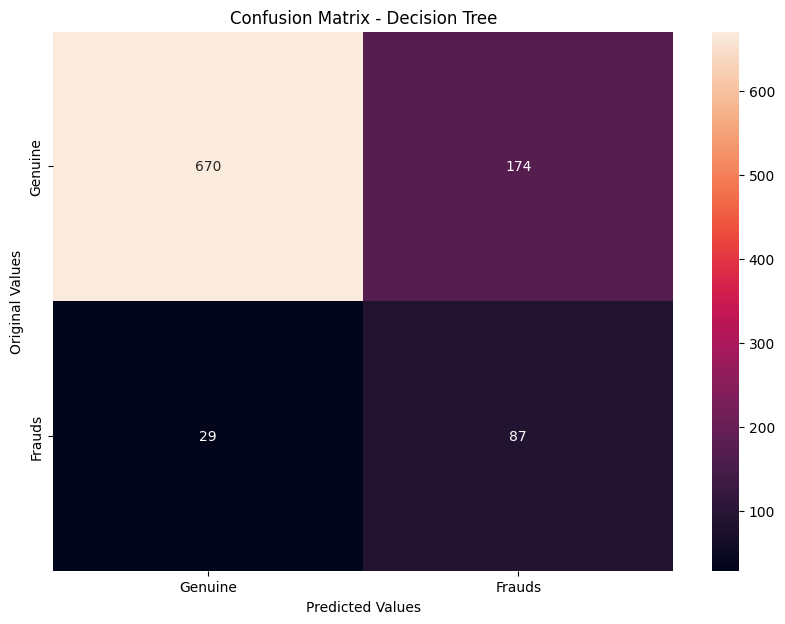

In [258]:
# Matriz de Confusão Decision Tree
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Original Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Frauds'])
ax.yaxis.set_ticklabels(['Genuine','Frauds'])
plt.show()

In [259]:
# Métricas de avaliação AdaBoost
classification_rep = classification_report(test_y, y_predictions_ab, target_names=unique_labels, output_dict=True)

# Acurácia
accuracy = classification_rep['accuracy']

# Precision, Recall e F1_score para cada classe
precision = classification_rep[chosen_pos_label]['precision']
recall = classification_rep[chosen_pos_label]['recall']
f1 = classification_rep[chosen_pos_label]['f1-score']

# Criando o DataFrame
metrics_ab = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                            'Results AB': [accuracy, precision, recall, f1]})
metrics_ab

,Metrics,Results AB
0,Accuracy,0.850000
1,Precision,0.429293
2,Recall,0.732759
3,F1_score,0.541401


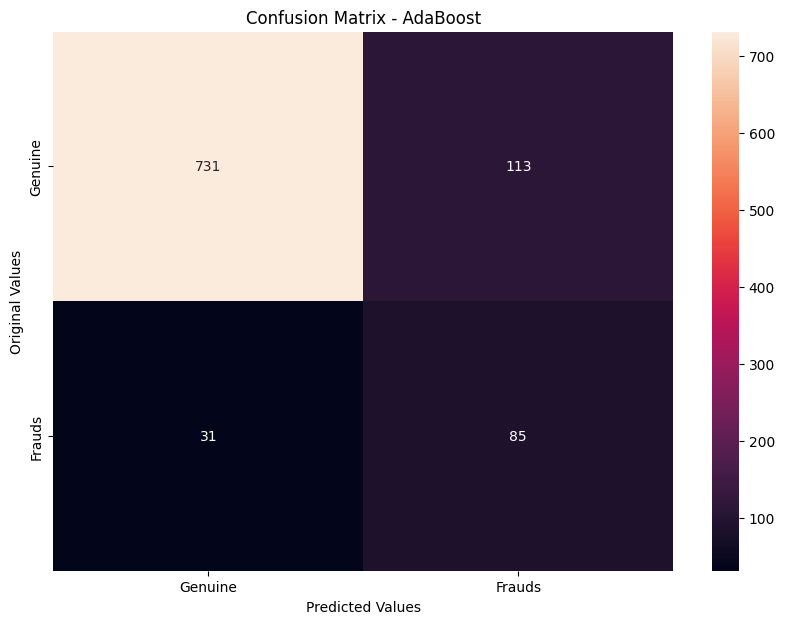

In [260]:
# Matriz de Confusão AdaBoost
confusion_matrix_ab = confusion_matrix(test_y, y_predictions_ab)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Original Values')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['Genuine','Frauds'])
ax.yaxis.set_ticklabels(['Genuine','Frauds'])
plt.show()

In [261]:
# Métricas de avaliação Gradient Boosting
classification_rep = classification_report(test_y, y_predictions_gb, target_names=unique_labels, output_dict=True)

# Acurácia
accuracy = classification_rep['accuracy']

# Precision, Recall e F1_score para cada classe
precision = classification_rep[chosen_pos_label]['precision']
recall = classification_rep[chosen_pos_label]['recall']
f1 = classification_rep[chosen_pos_label]['f1-score']

# Criando o DataFrame
metrics_gb = pd.DataFrame({'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                            'Results GB': [accuracy, precision, recall, f1]})
metrics_gb

,Metrics,Results GB
0,Accuracy,0.858333
1,Precision,0.450980
2,Recall,0.793103
3,F1_score,0.575000


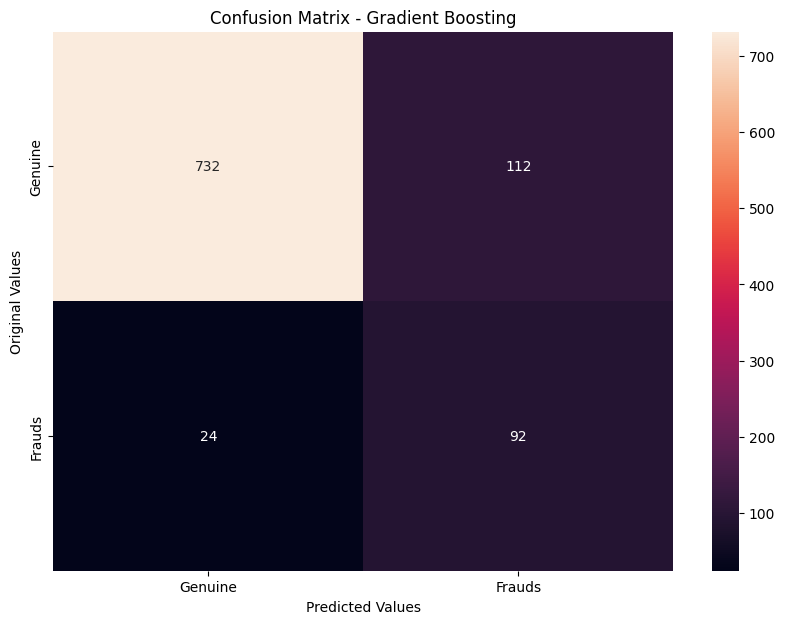

In [263]:
# Matriz de Confusão Gradient Boosting
confusion_matrix_gb = confusion_matrix(test_y, y_predictions_gb)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Original Values')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuine','Frauds'])
ax.yaxis.set_ticklabels(['Genuine','Frauds'])
plt.show()

In [264]:
# Contando o número de transações genuínas e fraudulentas existem no conjunto de teste
test_y.value_counts()

has_cbk
False    844
True     116
Name: count, dtype: int64

In [265]:
merged_df = pd.merge(metrics_rf, metrics_dt, on='Metrics')
merged_df = pd.merge(merged_df, metrics_ab, on='Metrics')
merged_df = pd.merge(merged_df, metrics_gb, on='Metrics')

In [267]:
merged_df.round(3)

,Metrics,Results RF,Results DT,Results AB,Results GB
0,Accuracy,0.796,0.789,0.850,0.858
1,Precision,0.337,0.333,0.429,0.451
2,Recall,0.716,0.750,0.733,0.793
3,F1_score,0.459,0.462,0.541,0.575
